# RF-Classification

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [2]:
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.DataFrame(cancer.target, columns=['y'])

In [3]:
X.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [4]:
y.head(3)

,y
0,0
1,0
2,0


In [5]:
X.isnull().sum(axis=0)

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [6]:
# 1-Benign, 0-Malignant
y['y'].value_counts()

1    357
0    212
Name: y, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,    #None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None
)

In [9]:
rf_clf_model = rf_clf.fit(X,y.values.ravel())

In [10]:
rf_train_probs = rf_clf_model.predict_proba(X_train)
rf_test_probs = rf_clf_model.predict_proba(X_test)

rf_preds_train = pd.DataFrame(rf_train_probs, columns=['class', 'proba'])
rf_preds_test = pd.DataFrame(rf_test_probs, columns=['class', 'proba'])

In [11]:
from sklearn import metrics
def AUC(X, y, t):
    fpr, tpr, thresholds = metrics.roc_curve(y, X)
    print(str(t) + ' AUC:', metrics.auc(fpr, tpr))

In [12]:
train_probs = rf_clf_model.predict_proba(X_train)
test_probs = rf_clf_model.predict_proba(X_test)
AUC(train_probs[:,1], y_train, 'Training')
AUC(test_probs[:,1], y_test, 'Testing')

Training AUC: 1.0
Testing AUC: 1.0


### Variable Importance

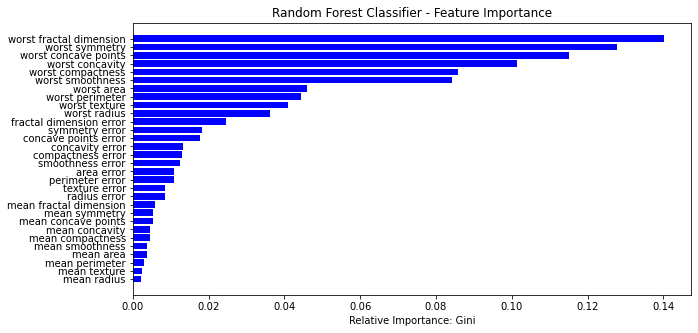

Feature Importance:
 [0.04098559 0.01300259 0.03608564 0.0842599  0.0052471  0.01762701
 0.04435093 0.14022505 0.00306295 0.00220365 0.01091426 0.00366177
 0.00856288 0.02450136 0.00531691 0.00378419 0.00837446 0.00231667
 0.00441204 0.00454428 0.08576286 0.01814266 0.12777619 0.10129519
 0.0133663  0.01252437 0.04584325 0.11507953 0.01088872 0.00588171]


In [13]:
plt.figure(figsize=(10, 5))
indices = np.argsort(rf_clf.feature_importances_)
plt.title('Random Forest Classifier - Feature Importance')
plt.barh(range(len(indices)), rf_clf.feature_importances_[indices], color='blue', align='center')
plt.yticks(range(len(indices)), X)
plt.xlabel('Relative Importance: Gini')
plt.show()
print('Feature Importance:\n', rf_clf.feature_importances_)

# RF-Regression

In [14]:
from sklearn.datasets import load_boston

In [15]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['Price'])

In [16]:
X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [17]:
y.head(3)

,Price
0,24.0
1,21.6
2,34.7


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100,
                               criterion='mse',
                               max_depth=None, 
                               min_samples_split=2, 
                               min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0, 
                               max_features='auto', 
                               max_leaf_nodes=None, 
                               min_impurity_decrease=0.0,
                               min_impurity_split=None, 
                               bootstrap=True, 
                               oob_score=False,
                               n_jobs=-1,     #None,
                               random_state=None, 
                               verbose=0, 
                               warm_start=False,
                               ccp_alpha=0.0, 
                               max_samples=None)

In [20]:
rf_reg_model = rf_reg.fit(X,y.values.ravel())

In [21]:
rf_train_pre = rf_reg_model.predict(X_train)
rf_test_pre = rf_reg_model.predict(X_test)

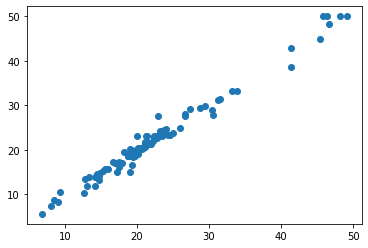

In [22]:
plt.scatter(rf_test_pre, y_test)

In [23]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, rf_test_pre)

1.706342225490194

In [24]:
# RMSE
from math import sqrt
sqrt(mean_squared_error(y_test, rf_test_pre))

1.3062703493114256

In [25]:
print('Training R^2:', rf_reg_model.score(X_train, y_train))
print('Testing R^2:', rf_reg_model.score(X_test, y_test))

Training R^2: 0.9846391759194039
Testing R^2: 0.9790448859741363
